In [2]:
%matplotlib inline 
import pandas as pd
import json
from collections import Counter

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence 
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection   import KFold, StratifiedKFold, cross_val_score,train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,f1_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.joblib import parallel_backend

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer

# Code interview.

## Description of the task

Given the movie database hosted in Kaggle,

https://www.kaggle.com/tmdb/tmdb-movie-metadata

 

We are interested in the task of predicting movie genres based on their title and overview (plot summary). For this you can employ any programming language (R, python, etc) that you feel comfortable with, and any NLP technique. We will focus on correctness of the approach, clarity of the code, comments and plots, over the performance obtained with the selected technique. You can submit your solution in plain source code, notebook file or github repository. Your solution should load the movie database, create train/val/test or cross-validation splits, train the genre classifier and evaluate the accuracy.

 

Since movies can be classified into multiple genres, this is a multi-label problem. Can you explain what are the common approaches to multi-label classification problems? How do you evaluate the accuracy of a multi-label classifier?

In [3]:
df = pd.read_csv("./tmdb_5000_movies.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [4]:
nameTitle2genre = {(row["original_title"],row["overview"]) : list(map(lambda x: x["name"],json.loads(row["genres"])))
                   for index,row in df.iterrows()}

# Genre distribution

Let´s take a look at the frequency of each genre...

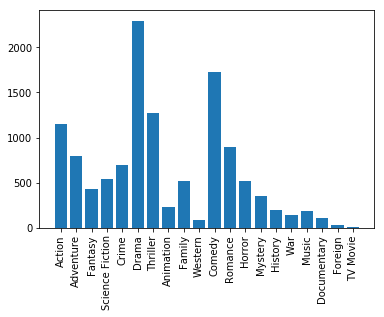

In [5]:
genreDistribution = Counter([genre for genres in nameTitle2genre.values() for genre in genres])

plt.bar(range(len(genreDistribution)), genreDistribution.values(), align='center')
plt.xticks(range(len(genreDistribution)), genreDistribution.keys(), rotation = "vertical")
plt.show()

It seems like there are some genres with few examples... 

In [6]:
genreDistDF = pd.DataFrame.from_dict(genreDistribution,orient="index")
genreDistDF.sort_values(by=0)

,0
TV Movie,8
Foreign,34
Western,82
Documentary,110
War,144
Music,185
History,197
Animation,234
Mystery,348
Fantasy,424


For this exercise, I´d propose to do an 70-15-15 Train-CV-Test split.

The problem is, we don´t have a lot of data...

We need a significant number of examples of each class in the test set for our results to be  meaningful. Otherwise, our evaluation metrics over the test set wouldn´t be statistically  significant.  I´d propose that we should have at least 50 instances of each category in the test set. That means we should have over 50/0.15 = 333 instances in  total of each category. For instance if we  set aside 15% of the 234 animation movies, we would only have 35 examples for testing... we hardly can evaluate with that little data, even if we use precision and recall in view of our skewed data.

If the business contexts allows it, I´d propose to treat categories with less than 333 examples as an "Others" category. In the next section, I write -  optional - code for doing so. If we want to keep all categories, skip its execution. Other alternatives would be to:

1) Keep all the categories and work with an 80-20% dev-test set split, using k-folds (k not too big ton ensure every fold is big enough, maybe = 4) or LOO CV on the 80% for model selection.

# Mask poorly represented genres.

If it is important to keep every genre, skip this section

In [7]:
maskDict = {genre:"Others" for genre in map(lambda x: x[0],
                                        filter(lambda item:item[1]<333,
                                               genreDistribution.items()))}
maskDict

{'Animation': 'Others',
 'Documentary': 'Others',
 'Foreign': 'Others',
 'History': 'Others',
 'Music': 'Others',
 'TV Movie': 'Others',
 'War': 'Others',
 'Western': 'Others'}

In [8]:
def maskGenre(genre,maskDict):
    if genre in  maskDict:
        return maskDict[genre]
    return genre
maskGenre("Western",maskDict),maskGenre("Action",maskDict)

('Others', 'Action')

In [9]:
nameTitle2genre = {(name,title) :list(map(lambda genre: maskGenre(genre,maskDict),genres)) 
                   for (name,title),genres in nameTitle2genre.items()}

In [10]:
genreDistribution = Counter([genre for genres in nameTitle2genre.values() for genre in genres])
genreDistDF = pd.DataFrame.from_dict(genreDistribution,orient="index")
genreDistDF.columns= ["Frequency"]
genreDistDF.sort_values(by="Frequency")

,Frequency
Mystery,348
Fantasy,424
Family,513
Horror,519
Science Fiction,535
Crime,696
Adventure,790
Romance,894
Others,994
Action,1154


Our data is in better shape now for doing predictive modelling!

# Train-CV-Test partitioniong

We have one more issue before firing our ML algos: the data is multi-labeled and skewed: most of the movies are dramas (2297) and very few mistery films (348).

We´ll use precision/recall/f-measure for measuring the quality of the models, but we´ll get back to that later. 

To ensure that our training,cv and test sets are representative  of our population, we should use stratified sampling. By doing this, we ensure that in our training, cv and test sets, the distribution of genres stays the same. Otherwise we could have proportionately more movies of  a genre in one set than in the other.

The problem is, in this multi-label context, how do you stratify your data? Do you keep the distribution of individual genres? Or the distribution of combinations of genres? There are $2^{n}$ - with n = the number of categories -  possible combinations of genres,  so given the size of our dataset, the former doesn´t seem viable. 

Note that we have very few data for the combinations:

In [11]:
genreCombinationsDistribution = Counter([str(genres) for genres in nameTitle2genre.values()])
genreDistDF = pd.DataFrame.from_dict(genreCombinationsDistribution,orient="index")
genreDistDF.sort_values(by=0)

,0
"['Action', 'Horror', 'Mystery', 'Science Fiction', 'Thriller']",1
"['Family', 'Adventure', 'Others']",1
"['Romance', 'Adventure', 'Action', 'Others']",1
"['Others', 'Action', 'Drama']",1
"['Science Fiction', 'Adventure']",1
"['Adventure', 'Drama', 'Action', 'Comedy', 'Romance']",1
"['Fantasy', 'Comedy', 'Science Fiction', 'Family']",1
"['Adventure', 'Fantasy', 'Others', 'Science Fiction', 'Family']",1
"['Fantasy', 'Others', 'Adventure']",1
"['Thriller', 'Science Fiction', 'Action']",1


In any case, stratified Sampling for multi-labeled data is not easy and has been examined in the literature: http://lpis.csd.auth.gr/publications/sechidis-ecmlpkdd-2011.pdf. 

In Scikit-learn, stratified sampling for multi-labeled data stratifies over combinations: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/model_selection/_split.py

So, there is no easy way to do stratified sampling (or not one that I know of). 

Let´s do a normal random train-test split and look at the distributions. If they are more or less the same, let´s carry on. If they vary a lot, we could randomly generate multiple random splits and pick the one that preserves the most the genres distribution of the population.

In [28]:
X,y = zip(*nameTitle2genre.items())

In [29]:
X_train, X_test_cv, y_train, y_test_cv = train_test_split(X, 
                                                          y, 
                                                          test_size=0.30, 
                                                          random_state=40)
X_test, X_cv, y_test, y_cv  = train_test_split(X_test_cv, 
                                               y_test_cv, 
                                               test_size=0.50, 
                                               random_state=40)

In [35]:
def normalizeCounter(counter):
    normalizedCounter = {}
    total = sum(counter.values(), 0.0)
    for key in counter:
        normalizedCounter[key] = counter[key]/ total
        normalizedCounter[key]*=100
    return normalizedCounter

In [37]:
genreDistributionY = Counter([genre for genres in y for genre in genres])
genreDistributionY_train = Counter([genre for genres in y_train for genre in genres])
genreDistributionY_test = Counter([genre for genres in y_test for genre in genres])
genreDistributionY_cv = Counter([genre for genres in y_cv for genre in genres])

yDistributionsDF = pd.DataFrame.from_dict([genreDistributionY,
                                         normalizeCounter(genreDistributionY),
                                         genreDistributionY_train,
                                         normalizeCounter(genreDistributionY_train),
                                         genreDistributionY_test,
                                         normalizeCounter(genreDistributionY_test),
                                         genreDistributionY_cv,
                                         normalizeCounter(genreDistributionY_cv),]).transpose()
yDistributionsDF.columns = ['Y', 
                          'Y %',
                          'Y train', 
                          'Y train%',
                          'Y test', 
                          'Y test%',
                          'Y cv', 
                          'Y cv%',]
yDistributionsDF

,Y,Y %,Y train,Y train%,Y test,Y test%,Y cv,Y cv%
Action,1154.0,9.490132,820.0,9.594010,171.0,9.457965,163.0,9.030471
Adventure,790.0,6.496711,556.0,6.505207,124.0,6.858407,110.0,6.094183
Comedy,1722.0,14.161184,1174.0,13.735814,284.0,15.707965,264.0,14.626039
Crime,696.0,5.723684,502.0,5.873406,105.0,5.807522,89.0,4.930748
Drama,2297.0,18.889803,1602.0,18.743419,334.0,18.473451,361.0,20.000000
Family,513.0,4.218750,352.0,4.118404,74.0,4.092920,87.0,4.819945
Fantasy,424.0,3.486842,294.0,3.439803,64.0,3.539823,66.0,3.656510
Horror,519.0,4.268092,366.0,4.282204,77.0,4.258850,76.0,4.210526
Mystery,348.0,2.861842,264.0,3.088803,42.0,2.323009,42.0,2.326870
Others,994.0,8.174342,691.0,8.084708,140.0,7.743363,163.0,9.030471


If we have enough data, the distributions should be preserved. Note that some genres have more data in one set than in  other. But in  general the differences are not that big. 

Let´s carry on.

# Classification 

Given that we are in a multilabel setting, where each movie can belong to multiple genres, we must pay attention not to treat this problem as a typical multi-class task, where all the task are mutually exclusive. Also, in our problem, the genres are not independent: a thriller is less likely to also be a comedy movie than a mistery one.

Having said that, there are multiple ways to address this issue. 

The first alternative is to treat every combination of labels as a single label. For instance, a movie that is both a comedy and a romance would have a "comedy, romantic" label. This is called in the literature the label power-set method, because as said before, you would $2^n$ labels. In our case,  this method is not reasonable: as we have seen before, we have little data in comparison to the number of possible categories. 

Another alternative is the binary relevance method, in which you train one binary classifier per label, that measures the relevance of a label. That is, you go category by category and train a classifier that asks: does this movie have this label or not?. It has a number of advantages: it´s simple, can work with little data and isn´t computationally expensive. The main drawback  is that is assumes independence between categories, which is not our case. As seen before, there´s quite a few romantic comedies and very little crime-action  dramas.

A variant of the binary relevance method is the classifier chain method, in which you also train one classifier per label, and you iteratively train them, in  order. You train your classifier for the first category, then move on  to the second category *and* you pass the decision taken by the former classifiers as a category itself. That way you can model dependences. Given that the order in which you process the categories matters, you can pick the best models or you can go for an ensemble of classifiers.

For simplicity, and given that I also wanted to use Neural Networks in this exercise, we can work with  a fourth alternative: use algorithms that can be adapted for multi-label contexts. Such is the  case of Random Forest. Random forests are ensembles of decision trees, which in turn can be adapted for multi-label context. Such is the case of the implementation  in Scikit Learn (http://scikit-learn.org/stable/modules/tree.html#tree-multioutput). In a nutshell, decision trees look at the values of given features and pick these using an optimal splitting criteria like entropy: in case of a multi-label problem, you use splitting criteria that looks at the average reduction over all the features.




##### Let´s finish getting our data in shape

In this problem, we have two different strings for doing prediction: title and overview.

We could  possibly use the title and the overview as different features. We would do that by concatenating their vector representations.

For simplicity, I  will concatenate their strings and treat them a single feature.

In [73]:
X = list(map(lambda x: str(x[0])+" "+str(x[1]), X))

In [38]:
X_train = list(map(lambda x: str(x[0])+" "+str(x[1]), X_train))
X_test = list(map(lambda x: str(x[0])+" "+str(x[1]), X_test))
X_cv = list(map(lambda x: str(x[0])+" "+str(x[1]), X_cv))

Last but not least, let´s binarize our data and get it into a one hot encoding.

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer
genres = sorted(set([genre for genres in y_train for genre in genres]))

mlb = MultiLabelBinarizer(classes = genres)

y_train_oh = mlb.fit_transform(y_train) #One hot encoding
y_cv_oh = mlb.transform(y_cv) #One hot encoding
y_test_oh = mlb.transform(y_test) #One hot encoding

## First approach: multi-label random forest

To start with, let´s use Random Forests with a standard TF-IDF vectorization. Given that we have little data, I will:

1) Use stemming for normalizing words and reducing.

2) Refrain from using n-grams (combinations of 2 tokens). We would need more data for this to be sensible.

In [42]:
#Tokenizer function with english stemming
def textPreprocessing(string):

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    stemmer = SnowballStemmer('english')
    stemmed_text = [stemmer.stem(i) for i in tokens]
    return stemmed_text

print("Not stemmed:")
print(X_train[0],"\n")
print("Stemmed:")
print(" ".join(textPreprocessing(X_train[0])))

Not stemmed:
Romance & Cigarettes Down-and-dirty musical love story set in the world of the working class. Nick is an ironworker who builds and repairs bridges. He's married to Kitty, a dressmaker, a strong and gentle woman with whom he has three daughters. He is carrying on a torrid affair with a redheaded woman named Tula. Nick is basically a good, hardworking man driven forward by will and blinded by his urges. 

Stemmed:
romanc cigarett down and dirti music love stori set in the world of the work class nick is an ironwork who build and repair bridg he s marri to kitti a dressmak a strong and gentl woman with whom he has three daughter he is carri on a torrid affair with a redhead woman name tula nick is basic a good hardwork man driven forward by will and blind by his urg


Let´s set up our sklearn pipeline as previously defined.

In [47]:
multilabel_rf = RandomForestClassifier(n_jobs=-1,random_state=40)

tfidf = TfidfVectorizer(stop_words = 'english',
                                tokenizer = textPreprocessing,
                                #norm = "l2",
                                ngram_range = (1,1),
                                #max_features=5000
                                       )
tfidf_multilabel_rf = Pipeline([('vectorizer', tfidf), ('classifier', multilabel_rf)])
tfidf_multilabel_rf.fit(X_train,y_train_oh)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...timators=10, n_jobs=-1,
            oob_score=False, random_state=40, verbose=0, warm_start=False))])

##### What´s our accuracy?

In [48]:
tfidf_multilabel_rf.score(X_cv,y_cv_oh)

0.077669902912621352

7,7% only? What´s going on? Let´s look at accuracy on the training set.

In [49]:
tfidf_multilabel_rf.score(X_train,y_train_oh)

0.83878643664485431

That´s not good. 84% accuracy in the training set and only 8% in our CV? What´s precision and recall looking like?

In [50]:
print("Precision - Training ")
print(precision_score(y_train_oh,tfidf_multilabel_rf.predict(X_train),average= None))
print("Precision - CV ")
print(precision_score(y_cv_oh,tfidf_multilabel_rf.predict(X_cv),average= None))

print("Recall - Training ")
print(recall_score(y_train_oh,tfidf_multilabel_rf.predict(X_train),average= None))
print("Recall - CV ")
print(recall_score(y_cv_oh,tfidf_multilabel_rf.predict(X_cv),average= None))


Precision - Training 
[ 1.          1.          0.99729973  1.          0.99177215  1.          1.
  1.          1.          1.          0.99822695  0.99713467  1.        ]
Precision - CV 


C:\Users\foru\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.67567568  0.4         0.62264151  0.38461538  0.64094955  1.          1.
  0.66666667  0.          1.          0.5862069   0.58333333  0.50943396]
Recall - Training 
[ 0.88170732  0.85611511  0.94378194  0.89442231  0.97815231  0.84090909
  0.79931973  0.84972678  0.79924242  0.86184211  0.88941548  0.87437186
  0.91955307]
Recall - CV 
[ 0.15337423  0.03636364  0.25        0.05617978  0.59833795  0.01149425
  0.01515152  0.02631579  0.          0.02068966  0.12878788  0.10447761
  0.14594595]


Not good either. What´s the weighted average of F1?

In [51]:
print("Train",f1_score(y_train_oh,
                       tfidf_multilabel_rf.predict(X_train),average= "weighted"))
print("CV",f1_score(y_cv_oh,
                       tfidf_multilabel_rf.predict(X_cv),average= "weighted"))

Train 0.946598654163
CV 0.262908465065


C:\Users\foru\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like we are heavily overfitting our data. 

If let unchecked, the decision trees of the random forest can grow a lot and  overfit. Possible solutions would be to limit the trees depth, and size, tune the number of trees in the forest,reduce vocabulary or as usually in presence of overfitting, get more data - which is not an option in our case -.

I don´t have much experience working with multi-label Random Forests, so it could be the case than when trying to partition the branches looking at all categories at  the same time, it´s overfitting the data. Let´s pivot back to the simpler binary relevance solution and then built on top of that...

I´ll also stop looking at accuracy and start optimizing in  terms of f1. F1 aka f-measure is the harmonic average of precision  and recall, two good metrics for skewed distributions.  Given more business context, we could choose to optimize/threshold precision and recall. For instance, you could optimize recall, constraining precision to be above a certain threshold.

For simplicity, let´s assume we don´t prefer high precision or high recall and set as an objetive high f1, their harmonic mean. 

## Second approach: binary relevance

Let´s start with random forests with binary relevance.

Scikit learn' s OneVsRest classifiers elegantly allows us to use the binary relevance method, training one binary classifier per category.

In [57]:
binary_rf = RandomForestClassifier(n_jobs=-1,random_state=40)

tfidf = TfidfVectorizer(stop_words = 'english',
                                tokenizer = textPreprocessing,
                                #norm = "l2",
                                ngram_range = (1,1),
                                #max_features=5000
                                       )
tfidf_binary_rf = Pipeline([('vectorizer', tfidf), ('classifier', binary_rf)])

# Run classifier
ovr_rf_tfidf = OneVsRestClassifier(tfidf_binary_rf) # 
ovr_rf_tfidf.fit(X_train, y_train_oh)

OneVsRestClassifier(estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...timators=10, n_jobs=-1,
            oob_score=False, random_state=40, verbose=0, warm_start=False))]),
          n_jobs=1)

Let´s look at the weighted f1 (weighted by doc class)

In [58]:
print("Train",f1_score(y_train_oh,
                       ovr_rf_tfidf.predict(X_train),average= "weighted"))
print("CV",f1_score(y_cv_oh,
                       ovr_rf_tfidf.predict(X_cv),average= "weighted"))

Train 0.94657320638
CV 0.302833012743


Woohoo! The training-cv gap is smaller, but it seems like we are still overfitting. 

Random forests have different approaches for reducing variance: pruning the trees, increasing the size  of the forests and particularly in sklearn, playing with max_depth, min_samples_split or min_samples_leaf. That´s a lot of parameters to tune.

Let´s try a simpler algorithm: SVM with a linear kernel. SVM offer two ways to reduce overfitting: the C parameter and the kernel. Linear kernels are the least complex, so let´s fix that parameter and play with C and/or vocab size

In [59]:
linear_SVC = SVC(kernel='linear',random_state=40)

tfidf = TfidfVectorizer(stop_words = 'english',
                                tokenizer = textPreprocessing,
                                norm = "l2",
                                ngram_range = (1,1),
                                min_df = 1
                                #max_features=5000
                                       )
tfidf_binary_linear_svc = Pipeline([('vectorizer', tfidf), ('classifier', linear_SVC)])

ovr_tfidf_binary_linear_svc = OneVsRestClassifier(tfidf_binary_linear_svc)
ovr_tfidf_binary_linear_svc.fit(X_train, y_train_oh)

OneVsRestClassifier(estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...r',
  max_iter=-1, probability=False, random_state=40, shrinking=True,
  tol=0.001, verbose=False))]),
          n_jobs=1)

Weighted average of f1...

In [60]:
print("Train",f1_score(y_train_oh,
                       ovr_tfidf_binary_linear_svc.predict(X_train),average= "weighted"))
print("CV",f1_score(y_cv_oh,
                       ovr_tfidf_binary_linear_svc.predict(X_cv),average= "weighted"))

Train 0.883087359943
CV 0.501105812882


That´s looking even better, in terms of variance (over-fitting reduction), but we still have a significant gap and F1-Score = 0.5 can be improved. Let´s look at precision and recall

In [61]:
print("Precision - Training ")
print(precision_score(y_train_oh,ovr_tfidf_binary_linear_svc.predict(X_train),average= None))
print("Precision - CV ")
print(precision_score(y_cv_oh,ovr_tfidf_binary_linear_svc.predict(X_cv),average= None))

print("Recall - Training ")
print(recall_score(y_train_oh,ovr_tfidf_binary_linear_svc.predict(X_train),average= None))
print("Recall - CV ")
print(recall_score(y_cv_oh,ovr_tfidf_binary_linear_svc.predict(X_cv),average= None))


Precision - Training 
[ 0.98457223  0.99253731  0.984689    0.98684211  0.9606599   1.
  0.99418605  0.99317406  1.          1.          0.98755187  0.99071207
  0.97526042]
Precision - CV 
[ 0.71774194  0.85365854  0.76404494  0.63265306  0.70893372  0.91666667
  0.81818182  0.88888889  0.5         0.76190476  0.63333333  0.86956522
  0.67241379]
Recall - Training 
[ 0.85609756  0.7176259   0.87649063  0.74701195  0.94506866  0.72727273
  0.58163265  0.79508197  0.45454545  0.74177632  0.75197472  0.8040201
  0.83687151]
Recall - CV 
[ 0.54601227  0.31818182  0.51515152  0.34831461  0.68144044  0.12643678
  0.13636364  0.21052632  0.02380952  0.22068966  0.28787879  0.29850746
  0.42162162]


Our algorithm has on average higher precision than recall. This might be due to the fact that since we are binarizing our entries, the data for each binary classifier is skewed. 

What happens if we play with class weights to use the loss function  to compensate the skewness and penalize more false negatives? Let´s balance class weights.

In [62]:
linear_weighted_SVC = SVC(kernel='linear',class_weight ="balanced",random_state=40)

tfidf = TfidfVectorizer(stop_words = 'english',
                                tokenizer = textPreprocessing,
                                norm = "l2",
                                ngram_range = (1,1),
                                min_df = 1
                                #max_features=5000
                                       )
tfidf_binary_linear_weighted_SVC = Pipeline([('vectorizer', tfidf), ('classifier', linear_weighted_SVC)])

ovr_tfidf_binary_linear_weighted_SVC = OneVsRestClassifier(tfidf_binary_linear_weighted_SVC)
ovr_tfidf_binary_linear_weighted_SVC.fit(X_train, y_train_oh)

OneVsRestClassifier(estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...r',
  max_iter=-1, probability=False, random_state=40, shrinking=True,
  tol=0.001, verbose=False))]),
          n_jobs=1)

What´s F1 looking like?

In [63]:
print("Train F1",f1_score(y_train_oh,
                       ovr_tfidf_binary_linear_weighted_SVC.predict(X_train),average= "weighted"))
print("CV F1",f1_score(y_cv_oh,
                       ovr_tfidf_binary_linear_weighted_SVC.predict(X_cv),average= "weighted"))

Train F1 0.94668059061
CV F1 0.595408020506


That´s slightly better. Take a  look at precision  and  recall...

In [64]:
print("Precision - CV ")
print(precision_score(y_cv_oh,ovr_tfidf_binary_linear_weighted_SVC.predict(X_cv),average= None))

print("Recall - CV ")
print(recall_score(y_cv_oh,ovr_tfidf_binary_linear_weighted_SVC.predict(X_cv),average= None))

Precision - CV 
[ 0.58080808  0.51612903  0.66798419  0.51260504  0.70247934  0.71153846
  0.58695652  0.57142857  0.40740741  0.56410256  0.48701299  0.6
  0.58767773]
Recall - CV 
[ 0.70552147  0.58181818  0.64015152  0.68539326  0.70637119  0.42528736
  0.40909091  0.42105263  0.26190476  0.45517241  0.56818182  0.44776119
  0.67027027]


Seems like we got slightly better results sacrificing precision to gain recall. But results are still bad in the CV set.

Let´s make our model much simpler, to see if we can reduce overfitting even more. In particular, let´s halve the C parameter (default value of 1) of our SVM. The C parameter controls the size of the margin, which is related to over-fitting: smaller values of C make the SVM generate a bigger margin at the expense of misclassifying some samples in the training set.

In [65]:
linear_weighted_SVC_reduced_c = SVC(C= 0.5,kernel='linear',class_weight ="balanced",random_state=40)

tfidf = TfidfVectorizer(stop_words = 'english',
                                tokenizer = textPreprocessing,
                                norm = "l2",
                                ngram_range = (1,1),
                                min_df = 1,
                                       )
tfidf_binary_linear_weighted_SVC_reduced_c = Pipeline([('vectorizer', tfidf), 
                                             ('classifier', linear_weighted_SVC_reduced_c)])

ovr_tfidf_binary_linear_weighted_SVC_reduced_c = OneVsRestClassifier(tfidf_binary_linear_weighted_SVC_reduced_c)
ovr_tfidf_binary_linear_weighted_SVC_reduced_c.fit(X_train, y_train_oh)

OneVsRestClassifier(estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...r',
  max_iter=-1, probability=False, random_state=40, shrinking=True,
  tol=0.001, verbose=False))]),
          n_jobs=1)

F1 looks like:

In [66]:
print("Train F1",f1_score(y_train_oh,
                       ovr_tfidf_binary_linear_weighted_SVC_reduced_c.predict(X_train),average= "weighted"))
print("CV F1",f1_score(y_cv_oh,
                       ovr_tfidf_binary_linear_weighted_SVC_reduced_c.predict(X_cv),average= "weighted"))

Train F1 0.894076862833
CV F1 0.611680570201


That reduces overfitting slightly more!

Let´s store the f1 scores in memory for comparison later on...

In [67]:
f1_svm = dict(zip(genres,
                  f1_score(y_cv_oh,
                           ovr_tfidf_binary_linear_weighted_SVC_reduced_c.predict(X_cv),average= None)))

In [68]:
f1_svm

{'Action': 0.65384615384615374,
 'Adventure': 0.5381526104417671,
 'Comedy': 0.6729323308270676,
 'Crime': 0.55299539170506917,
 'Drama': 0.71625344352617082,
 'Family': 0.55844155844155841,
 'Fantasy': 0.5123966942148761,
 'Horror': 0.54794520547945202,
 'Mystery': 0.30588235294117649,
 'Others': 0.54109589041095896,
 'Romance': 0.54000000000000004,
 'Science Fiction': 0.53543307086614178,
 'Thriller': 0.64516129032258063}

## Could we get more data?

The classic solution for overfitting, besides from working with less complex models, is getting more data.

I´ve assumed I cannot get more data for this exercise. However, one option to do so inexpensively would be to download a dump of the wikipedia, and use it´s hierarchy to  get movie descriptions for each genre. For instance, here https://en.wikipedia.org/wiki/List_of_action_films_of_the_2010s you have a list of all the action  movies of 2010 (you can do the same for other decades and genres).

Notice that you can also download wikipedia data for any language...

By getting more data - even if it doesn´t exactly resemble the data of our dataset - we can improve our algorithms. This is known as data augmentation - getting or generating data that resembles your distribution. We would treat the content of each article - or windows of it with the same size as  the original training data - as the text of our overview and fit a bigger model without fearing overfitting.

## Moving forward... proper grid search

So far I have shown how to start a ML task with a simple approach, and then iteratively work out how to make it better by understanding the types of mistakes the model is making. We have diagnosed high variance (overfitting) and skewed classes. The theory says that the solution for these issues is 1) getting more data, 2) building  a simpler model (we switched from RF to Linear SVM, tuning C), 3) applying weights to the classes and 4) using precision-recall-f-measure for diagnosing the model´s performance.

I have iteratively build new models to show how applying the theory we can improve our results, rather than doing brute force search over an algorithm/parameter space. However, to speed things up, we would do grid search to select algorithms and parameters. This can  be done in SkLearn with GridSearchCV.

Other alternatives would be to build an ensemble of smaller models and testing new features. Particularly, potentially other features like director and actors would allow us to better model the genre of a film. After all, it is known that Swarzeneger usually does action and Hugh Grant does romantic comedies...

Another way to address the shortage of text is to use pre-trained word embeddings. Word embeddings are matrices codifying the meaning of a specific word by using neural networks and looking at their co-occurrence in very large corpora of text. In word embeddings, similar words like love,romance, wedding would be represented with very similar vectors. That way, we could leverage a pre-existing language knowledge base.

Let´s give word embeddings a try, along with a very simple Neural Network with lots of regularization. (I acknowledge from scratch that 5000 films is not big enough for deep learning).

# Neural networks

## Load the embeddings

For this exercise, I´ll use a Standford Glove embedding generated using wikipedia data, with 400,000 words and 100 dimensions per token. There are more powerful embeddings available - more tokens and more dimensions per token - but I need to be able to squeeze the embeddings into my GPU with limited memory :) 

In [69]:
# What´s the maximum num of words a review can have?
max(map(lambda x: len(x.split(" ")),X_train+X_test+X_cv))

179

In [70]:
GLOVE_DIR = "./"
EMBEDDING_DIM = 100
MAX_NB_WORDS = 400000
MAX_SEQUENCE_LENGTH = 200 # Rounded the 179 maximum sequence we found in the previous point

Let us load the embeddings

In [71]:
embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'),encoding = "utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


And tokenize the text using Keras´s procedures.

Note that I fit the tokenizer on the whole X. 

Is this cheating?

Nope. In the next cell, we pass the embedding  to a matrix. Rather than fitting the whole embedding into memory - which would make my GPU unable to handle the training - we only load the entries of the words that we will use. By loading the entries of all the words - including X_train, X_cv and X_test - we will leverage the pre-trained embeddings to be able to understand words not seen in  X_train.

Say for instance katana is in the test or cv sets and is not in the description of movies in X_train... But sword is... katana and sword probably have vectors that are very similar. If we see sword in the training data, why should not we treat katana as a sword when making predictions?

In [74]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X_train)
print('Found %s unique tokens.' % len(word_index))

Found 24099 unique tokens.


To account for varying sequences, we use padding

In [75]:
X_train_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [87]:
X_cv_padded = pad_sequences(tokenizer.texts_to_sequences(X_cv),maxlen=MAX_SEQUENCE_LENGTH)
X_test_padded = pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH)

We now have our embedding as a dictionary. We transform it into a matrix so that it can be used by Keras

In [77]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

We now create a NN and train it for each category. 

For this exercise will use a  very small network, with  one LSTM and one dense output layer, to avoid overfitting. For normalization, we can use dropout.

Note that neural networks can  be perfectly used in  a  multi-label context depending on the activation function that you use on the last layer. If you uses softmax, you are expecting each instance in your dataset to have only one category. On the other hand, if you use sigmoids, then  you can work with a multi-label setting.

Given that we  chose to  binarize data before, I will keep this setting. Binary cross entropy is the standard loss function

I tried using class weight, but didn´t manage to get better results.

We also set callbacks to 1) store model weights on disk and pick the one with highest accuracy and 2) stop if we don´t see any improvements on the CV set.  

50 epochs should be fine as we don´t have that much data.

In [81]:
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping
for category in genres:

    print(category)
        
    filepath= "nn/"+category+"/proc-weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=False, mode='min')
    callbacks_list = [checkpoint,EarlyStopping(monitor='val_acc', patience=30, verbose=0, mode='auto')]

    y_train_binary = list(map(lambda x: 1 if category in x else 0, y_train))
    y_cv_binary = list(map(lambda x: 1 if category in x else 0, y_cv))

    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                    EMBEDDING_DIM,
                                    weights=[embedding_matrix],
                                    input_length=MAX_SEQUENCE_LENGTH,
                                    trainable=False))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    

    # Let´s set class weights inversely proportionate to class count
    #class_weight = dict(map(lambda x: (x[0],1/(x[1]/len(y_train_binary))),Counter(y_train_binary).items()))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    model.fit(X_train_padded, np.asarray(list(map(lambda x: [x],y_train_binary))), 
#             class_weight=class_weight.
              validation_data=(X_cv_padded, np.asarray(list(map(lambda x: [x],y_cv_binary)))),
              epochs=50, batch_size=256,callbacks= callbacks_list)

Comedy
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 100)          2410000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,527,377
Trainable params: 117,377
Non-trainable params: 2,410,000
_________________________________________________________________
None
Train on 3362 samples, validate on 721 samples
Epoch 1/50
3328/3362 [============================>.] - ETA: 0s - l

Train on 3362 samples, validate on 721 samples
Epoch 1/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.4933 - acc: 0.8158
Epoch 00001: saving model to nn/Crime/proc-weights-improvement-01-0.88.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.4932 - acc: 0.8159 - val_loss: 0.3689 - val_acc: 0.8766
Epoch 2/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.4199 - acc: 0.8507
Epoch 00002: saving model to nn/Crime/proc-weights-improvement-02-0.88.hdf5
3362/3362 [==============================] - 5s 1ms/step - loss: 0.4204 - acc: 0.8504 - val_loss: 0.3674 - val_acc: 0.8766
Epoch 3/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.4083 - acc: 0.8498
Epoch 00003: saving model to nn/Crime/proc-weights-improvement-03-0.88.hdf5
3362/3362 [==============================] - 5s 1ms/step - loss: 0.4073 - acc: 0.8504 - val_loss: 0.3554 - val_acc: 0.8766
Epoch 4/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.395

Epoch 29/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2174 - acc: 0.9123
Epoch 00029: saving model to nn/Crime/proc-weights-improvement-29-0.89.hdf5
3362/3362 [==============================] - 9s 3ms/step - loss: 0.2180 - acc: 0.9123 - val_loss: 0.2676 - val_acc: 0.8877
Epoch 30/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2078 - acc: 0.9162
Epoch 00030: saving model to nn/Crime/proc-weights-improvement-30-0.90.hdf5
3362/3362 [==============================] - 7s 2ms/step - loss: 0.2077 - acc: 0.9167 - val_loss: 0.2664 - val_acc: 0.8974
Epoch 31/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2006 - acc: 0.9198
Epoch 00031: saving model to nn/Crime/proc-weights-improvement-31-0.87.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.2001 - acc: 0.9200 - val_loss: 0.3008 - val_acc: 0.8669
Epoch 32/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1899 - acc: 0.9243
Epoch 00032: saving model t

Epoch 4/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.5982 - acc: 0.6791
Epoch 00004: saving model to nn/Drama/proc-weights-improvement-04-0.66.hdf5
3362/3362 [==============================] - 8s 2ms/step - loss: 0.5978 - acc: 0.6794 - val_loss: 0.6143 - val_acc: 0.6644
Epoch 5/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.5918 - acc: 0.6839
Epoch 00005: saving model to nn/Drama/proc-weights-improvement-05-0.68.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.5916 - acc: 0.6841 - val_loss: 0.5978 - val_acc: 0.6838
Epoch 6/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.5795 - acc: 0.6962
Epoch 00006: saving model to nn/Drama/proc-weights-improvement-06-0.70.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.5814 - acc: 0.6942 - val_loss: 0.5682 - val_acc: 0.7046
Epoch 7/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.5715 - acc: 0.6932
Epoch 00007: saving model to nn

Epoch 32/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.3915 - acc: 0.8233
Epoch 00032: saving model to nn/Drama/proc-weights-improvement-32-0.71.hdf5
3362/3362 [==============================] - 7s 2ms/step - loss: 0.3907 - acc: 0.8242 - val_loss: 0.6601 - val_acc: 0.7143
Epoch 33/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.3687 - acc: 0.8356
Epoch 00033: saving model to nn/Drama/proc-weights-improvement-33-0.70.hdf5
3362/3362 [==============================] - 7s 2ms/step - loss: 0.3689 - acc: 0.8355 - val_loss: 0.6597 - val_acc: 0.6990
Epoch 34/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.3375 - acc: 0.8540
Epoch 00034: saving model to nn/Drama/proc-weights-improvement-34-0.68.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.3393 - acc: 0.8528 - val_loss: 0.6798 - val_acc: 0.6782
Epoch 35/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.3424 - acc: 0.8531
Epoch 00035: saving model t

Epoch 7/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2703 - acc: 0.8999
Epoch 00007: saving model to nn/Family/proc-weights-improvement-07-0.87.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.2715 - acc: 0.8992 - val_loss: 0.3117 - val_acc: 0.8710
Epoch 8/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2800 - acc: 0.8960
Epoch 00008: saving model to nn/Family/proc-weights-improvement-08-0.87.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.2801 - acc: 0.8959 - val_loss: 0.2965 - val_acc: 0.8724
Epoch 9/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2578 - acc: 0.9005
Epoch 00009: saving model to nn/Family/proc-weights-improvement-09-0.88.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.2575 - acc: 0.8998 - val_loss: 0.2948 - val_acc: 0.8835
Epoch 10/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2470 - acc: 0.9041
Epoch 00010: saving model t

Epoch 35/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1344 - acc: 0.9495
Epoch 00035: saving model to nn/Family/proc-weights-improvement-35-0.89.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.1352 - acc: 0.9491 - val_loss: 0.2969 - val_acc: 0.8932
Epoch 36/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1284 - acc: 0.9504
Epoch 00036: saving model to nn/Family/proc-weights-improvement-36-0.90.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.1286 - acc: 0.9500 - val_loss: 0.3425 - val_acc: 0.8988
Epoch 37/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1345 - acc: 0.9462
Epoch 00037: saving model to nn/Family/proc-weights-improvement-37-0.89.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.1359 - acc: 0.9453 - val_loss: 0.2845 - val_acc: 0.8877
Epoch 38/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1221 - acc: 0.9519
Epoch 00038: saving mode

Epoch 41/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9669
Epoch 00041: saving model to nn/Fantasy/proc-weights-improvement-41-0.91.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.0958 - acc: 0.9664 - val_loss: 0.2588 - val_acc: 0.9126
Epoch 42/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0803 - acc: 0.9733
Epoch 00042: saving model to nn/Fantasy/proc-weights-improvement-42-0.90.hdf5
3362/3362 [==============================] - 5s 1ms/step - loss: 0.0808 - acc: 0.9729 - val_loss: 0.2770 - val_acc: 0.9001
Epoch 43/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0867 - acc: 0.9678
Epoch 00043: saving model to nn/Fantasy/proc-weights-improvement-43-0.91.hdf5
3362/3362 [==============================] - 5s 1ms/step - loss: 0.0863 - acc: 0.9682 - val_loss: 0.2574 - val_acc: 0.9098
Epoch 44/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0795 - acc: 0.9751
Epoch 00044: saving m

Epoch 43/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0706 - acc: 0.9736
Epoch 00043: saving model to nn/Horror/proc-weights-improvement-43-0.91.hdf5
3362/3362 [==============================] - 9s 3ms/step - loss: 0.0704 - acc: 0.9738 - val_loss: 0.3002 - val_acc: 0.9057
Epoch 44/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0595 - acc: 0.9766
Epoch 00044: saving model to nn/Horror/proc-weights-improvement-44-0.91.hdf5
3362/3362 [==============================] - 8s 2ms/step - loss: 0.0591 - acc: 0.9768 - val_loss: 0.2898 - val_acc: 0.9112
Epoch 45/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0656 - acc: 0.9769
Epoch 00045: saving model to nn/Horror/proc-weights-improvement-45-0.92.hdf5
3362/3362 [==============================] - 8s 2ms/step - loss: 0.0652 - acc: 0.9771 - val_loss: 0.3174 - val_acc: 0.9209
Epoch 46/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0688 - acc: 0.9754
Epoch 00046: saving mode

3328/3362 [============================>.] - ETA: 0s - loss: 0.3912 - acc: 0.8326
Epoch 00010: saving model to nn/Others/proc-weights-improvement-10-0.79.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.3902 - acc: 0.8331 - val_loss: 0.4519 - val_acc: 0.7933
Epoch 11/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.3947 - acc: 0.8302
Epoch 00011: saving model to nn/Others/proc-weights-improvement-11-0.81.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.3932 - acc: 0.8314 - val_loss: 0.4434 - val_acc: 0.8086
Epoch 12/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.3707 - acc: 0.8344
Epoch 00012: saving model to nn/Others/proc-weights-improvement-12-0.80.hdf5
3362/3362 [==============================] - 5s 1ms/step - loss: 0.3708 - acc: 0.8337 - val_loss: 0.4543 - val_acc: 0.7989
Epoch 13/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.3875 - acc: 0.8383
Epoch 00013: saving model to nn/Othe

Epoch 38/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1970 - acc: 0.9174
Epoch 00038: saving model to nn/Others/proc-weights-improvement-38-0.80.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.1984 - acc: 0.9167 - val_loss: 0.5649 - val_acc: 0.8044
Epoch 39/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1854 - acc: 0.9258
Epoch 00039: saving model to nn/Others/proc-weights-improvement-39-0.82.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.1857 - acc: 0.9259 - val_loss: 0.5282 - val_acc: 0.8183
Epoch 40/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1986 - acc: 0.9177
Epoch 00040: saving model to nn/Others/proc-weights-improvement-40-0.81.hdf5
3362/3362 [==============================] - 5s 1ms/step - loss: 0.1982 - acc: 0.9179 - val_loss: 0.5152 - val_acc: 0.8072
Epoch 41/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1762 - acc: 0.9321
Epoch 00041: saving mode

Epoch 40/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2011 - acc: 0.9195
Epoch 00040: saving model to nn/Romance/proc-weights-improvement-40-0.83.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.2021 - acc: 0.9191 - val_loss: 0.4104 - val_acc: 0.8280
Epoch 41/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1873 - acc: 0.9264
Epoch 00041: saving model to nn/Romance/proc-weights-improvement-41-0.83.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.1864 - acc: 0.9268 - val_loss: 0.5023 - val_acc: 0.8294
Epoch 42/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1682 - acc: 0.9378
Epoch 00042: saving model to nn/Romance/proc-weights-improvement-42-0.82.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.1695 - acc: 0.9366 - val_loss: 0.4567 - val_acc: 0.8169
Epoch 43/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1702 - acc: 0.9333
Epoch 00043: saving m

Epoch 15/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2156 - acc: 0.9189
Epoch 00015: saving model to nn/Science Fiction/proc-weights-improvement-15-0.89.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.2156 - acc: 0.9191 - val_loss: 0.2885 - val_acc: 0.8904
Epoch 16/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2367 - acc: 0.9081
Epoch 00016: saving model to nn/Science Fiction/proc-weights-improvement-16-0.92.hdf5
3362/3362 [==============================] - 5s 1ms/step - loss: 0.2379 - acc: 0.9072 - val_loss: 0.2236 - val_acc: 0.9182
Epoch 17/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2201 - acc: 0.9201
Epoch 00017: saving model to nn/Science Fiction/proc-weights-improvement-17-0.93.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.2198 - acc: 0.9200 - val_loss: 0.2072 - val_acc: 0.9279
Epoch 18/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.2013 - acc: 0.92

3328/3362 [============================>.] - ETA: 0s - loss: 0.1110 - acc: 0.9573
Epoch 00042: saving model to nn/Science Fiction/proc-weights-improvement-42-0.92.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.1105 - acc: 0.9578 - val_loss: 0.2612 - val_acc: 0.9223
Epoch 43/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1007 - acc: 0.9609
Epoch 00043: saving model to nn/Science Fiction/proc-weights-improvement-43-0.92.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.1007 - acc: 0.9610 - val_loss: 0.2514 - val_acc: 0.9237
Epoch 44/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0981 - acc: 0.9600
Epoch 00044: saving model to nn/Science Fiction/proc-weights-improvement-44-0.93.hdf5
3362/3362 [==============================] - 8s 2ms/step - loss: 0.0973 - acc: 0.9604 - val_loss: 0.2696 - val_acc: 0.9279
Epoch 45/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.0843 - acc: 0.9703
Epoch 000

Epoch 16/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.4111 - acc: 0.8011
Epoch 00016: saving model to nn/Thriller/proc-weights-improvement-16-0.79.hdf5
3362/3362 [==============================] - 5s 1ms/step - loss: 0.4120 - acc: 0.8004 - val_loss: 0.4250 - val_acc: 0.7920
Epoch 17/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.4045 - acc: 0.8074
Epoch 00017: saving model to nn/Thriller/proc-weights-improvement-17-0.76.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.4062 - acc: 0.8064 - val_loss: 0.4703 - val_acc: 0.7614
Epoch 18/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.4425 - acc: 0.7822
Epoch 00018: saving model to nn/Thriller/proc-weights-improvement-18-0.79.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.4423 - acc: 0.7817 - val_loss: 0.4295 - val_acc: 0.7947
Epoch 19/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.3970 - acc: 0.8110
Epoch 00019: savin

Epoch 44/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1731 - acc: 0.9357
Epoch 00044: saving model to nn/Thriller/proc-weights-improvement-44-0.76.hdf5
3362/3362 [==============================] - 6s 2ms/step - loss: 0.1735 - acc: 0.9355 - val_loss: 0.5899 - val_acc: 0.7559
Epoch 45/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1465 - acc: 0.9408
Epoch 00045: saving model to nn/Thriller/proc-weights-improvement-45-0.76.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.1459 - acc: 0.9408 - val_loss: 0.6762 - val_acc: 0.7614
Epoch 46/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1239 - acc: 0.9549
Epoch 00046: saving model to nn/Thriller/proc-weights-improvement-46-0.75.hdf5
3362/3362 [==============================] - 5s 2ms/step - loss: 0.1239 - acc: 0.9545 - val_loss: 0.6677 - val_acc: 0.7517
Epoch 47/50
3328/3362 [============================>.] - ETA: 0s - loss: 0.1129 - acc: 0.9588
Epoch 00047: savin

Note the big differences in training and cv performance... our NN are definetely overfitting. Let´s pick the one with the best performance on the CV set and get some metrics on it...

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [97]:
f1_lstm = {}
for genre in genres:
    filenames = os.listdir("./nn/"+genre)
    model.load_weights("./nn/"+genre+"/"+filenames[len(filenames)-1])
    y_cv_binary_pred = model.predict(X_cv_padded)
    
    y_cv_binary = list(map(lambda x: 1 if genre in x else 0, y_cv))
    f1_lstm[genre] = f1_score(y_cv_binary,list(map(lambda x: 1 if x> 0.5 else 0,y_cv_binary_pred)))


Now we can compare the results of the SVM and the LSTM. Note that LSTM outperforms SVM in some cases, whilst SVM predominates in the majority.

Time permitting, we could come with some ensemble method.

If we had more data, a deep learning model would possibly outperform SVM

In [83]:
pd.DataFrame.from_dict({"SVM":f1_svm,"LSTM":f1_lstm})

,LSTM,SVM
Action,0.704050,0.653846
Adventure,0.512563,0.538153
Comedy,0.654244,0.672932
Crime,0.532468,0.552995
Drama,0.730924,0.716253
Family,0.484848,0.558442
Fantasy,0.413043,0.512397
Horror,0.548387,0.547945
Mystery,0.117647,0.305882
Others,0.458716,0.541096


Finally, we test our model on fresh test data:

In [89]:
f1_svm_test = dict(zip(genres,
f1_score(y_test_oh,ovr_tfidf_binary_linear_weighted_SVC_reduced_c.predict(X_test),average=None)))

In [93]:
f1_lstm_test = {}
for genre in genres:
    filenames = os.listdir("./nn/"+genre)
    model.load_weights("./nn/"+genre+"/"+filenames[len(filenames)-1])
    y_test_binary_pred = model.predict(X_test_padded)
    
    y_test_binary = list(map(lambda x: 1 if genre in x else 0, y_test))
    f1_lstm_test[genre] = f1_score(y_test_binary,list(map(lambda x: 1 if x> 0.5 else 0,y_test_binary_pred)))
    print(genre,f1_lstm_test[genre],f1_svm[genre])
    

Action 0.631884057971 0.653846153846
Adventure 0.398058252427 0.538152610442
Comedy 0.646586345382 0.672932330827
Crime 0.362573099415 0.552995391705
Drama 0.68340306834 0.716253443526
Family 0.380952380952 0.558441558442
Fantasy 0.395604395604 0.512396694215
Horror 0.496124031008 0.547945205479
Mystery 0.0434782608696 0.305882352941
Others 0.379888268156 0.541095890411
Romance 0.409523809524 0.54
Science Fiction 0.573643410853 0.535433070866
Thriller 0.570637119114 0.645161290323


In [95]:
pd.DataFrame.from_dict({"F1 measure - SVC - test data": f1_svm_test,
                        "F1 measure - LSTM - test data": f1_lstm_test})

,F1 measure - LSTM - test data,F1 measure - SVC - test data
Action,0.631884,0.656250
Adventure,0.398058,0.548043
Comedy,0.646586,0.691358
Crime,0.362573,0.545455
Drama,0.683403,0.661765
Family,0.380952,0.496454
Fantasy,0.395604,0.536585
Horror,0.496124,0.628571
Mystery,0.043478,0.346939
Others,0.379888,0.507246


# Conclusions and future work

The obtained F1 scores are not good enough to rely on this classifier.

We have seen that there is  an important overfitting problem while training all the algorithms we have used. We have argued that one way to solve this is by getting more data - potentially from the wikipedia -. The next recipe for  overfitting is using simpler models, or a collection of those. We could also use features with less diversity, such as authors and directors.

From an algorithmic point of view, we could keep trying to choose  better combinations by using gridsearch. Knowing that we have overfitting, we would try to use algorithms that are not too complex.